#  <i>&emsp;&emsp;&emsp;&emsp; Heart Disease Prediction - Classification</i>

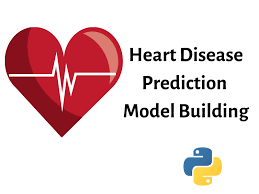

<font color='red'><h2>Introduction</h2></font>

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using Xgboost Classfication

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Dataset Balancing
from imblearn.over_sampling import SMOTE

# Train Test Split
from sklearn.model_selection import train_test_split

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

# Hyperparameter Tuning Technique
from sklearn.model_selection import RandomizedSearchCV

# Classification Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

# Exporting the data
import pickle

sns.set()
warnings.filterwarnings('ignore')

## Data Description
The dataset contains 13 independent features and 1 target feature as described below.

1.  age
2.  sex
3.  cp:- (chest pain type) (4 values)
4.  trestbps:- (resting blood pressure)
5.  chol:- (serum cholestoral in mg/dl)
6.  fbs:- (fasting blood sugar) > 120 mg/dl
7.  restecg:- (resting electrocardiographic results) (values 0,1,2)
8.  thalach:- (maximum heart rate achieved)
9.  exang:- (exercise induced angina)
10. oldpeak:- ST depression induced by exercise relative to rest.
11. slope:- slope of the peak exercise ST segment
12. ca:- number of major vessels (0-3) colored by flourosopy
13. thal:- 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target:- It is the binary target variable, 0 indicates that the patient has heart disease, the                value is 1 if not.

In [2]:
# importing dataset
data=pd.read_csv('Heart_Disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# data.head()
# [sex,fbs,exang,age,trestbps,chol,thalach,cp,restecg,slope,ca,thal,oldpeak]
# [[1, 1, 0, 0.9521966015692286, 0.7639557707131766, -0.2563337074803348, 0.01544278556612327, 1.9731229165644262, -1.0058318722806536, -2.2745786069731917, -0.7144288705953448, -2.1488727086336334, 1.0873380612201566]]
# [0]

In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# checking na values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# checking duplicates values
data.duplicated().sum()

1

In [8]:
# dropping duplicated values
data.drop_duplicates(inplace=True)

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploratory Data Analysis

[None, None, None, None, None, None]

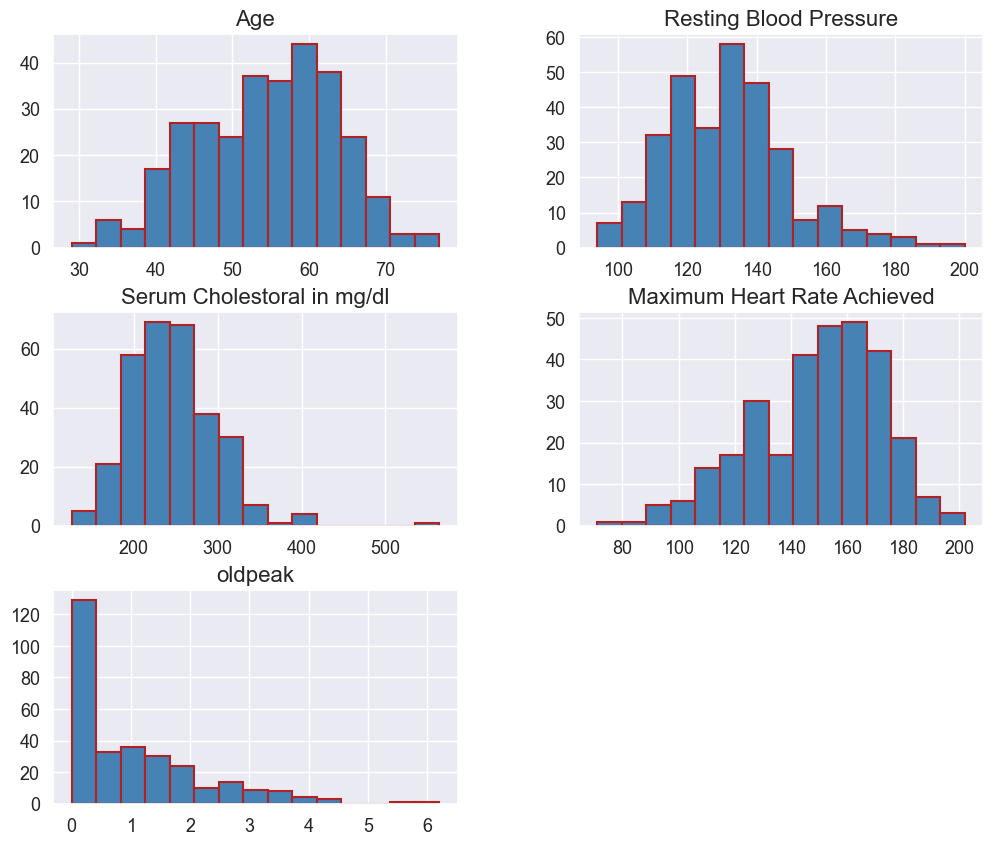

In [10]:
# EDA on continous features

continuous=['age','trestbps','chol','thalach','oldpeak']
names=['Age','Resting Blood Pressure','Serum Cholestoral in mg/dl','Maximum Heart Rate Achieved','oldpeak']
df = pd.DataFrame(data[continuous].values, columns=names)
fig=df.hist(figsize=(12, 10),
                          bins=15,
                          layout=(3, 2),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5,ylabelsize=13,xlabelsize=13);
[x.title.set_size(16) for x in fig.ravel()]

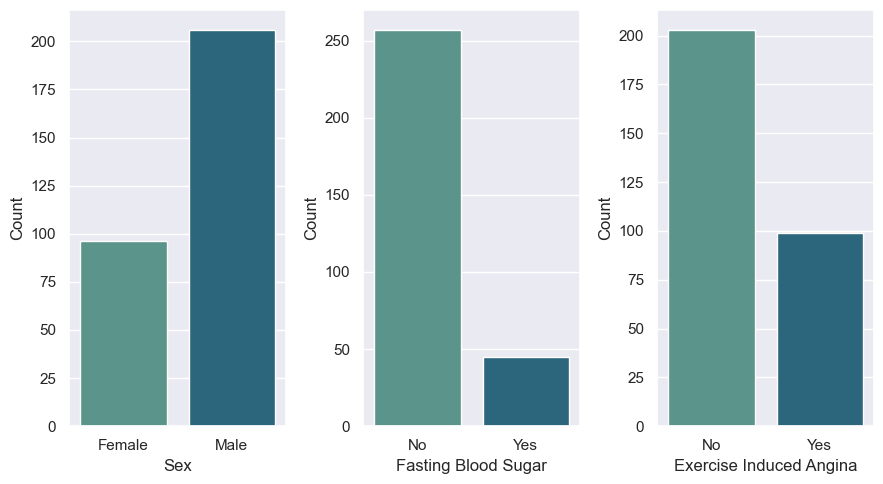

In [11]:
# EDA on categorical features
categorical=['sex','fbs','exang']
names=['Sex','Fasting Blood Sugar','Exercise Induced Angina']
df=pd.DataFrame(data[categorical].values,columns=names)

plt.subplots(1, 3, figsize=(9, 5))

for index, column in enumerate(df.columns):

    plt.subplot(1, 3, index + 1)
    sns.countplot(x=column, data=df, palette='crest')

    plt.ylabel('Count')
    if (column == 'Sex'):
        plt.xticks([0, 1], ['Female', 'Male'])
    else:
        plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout();

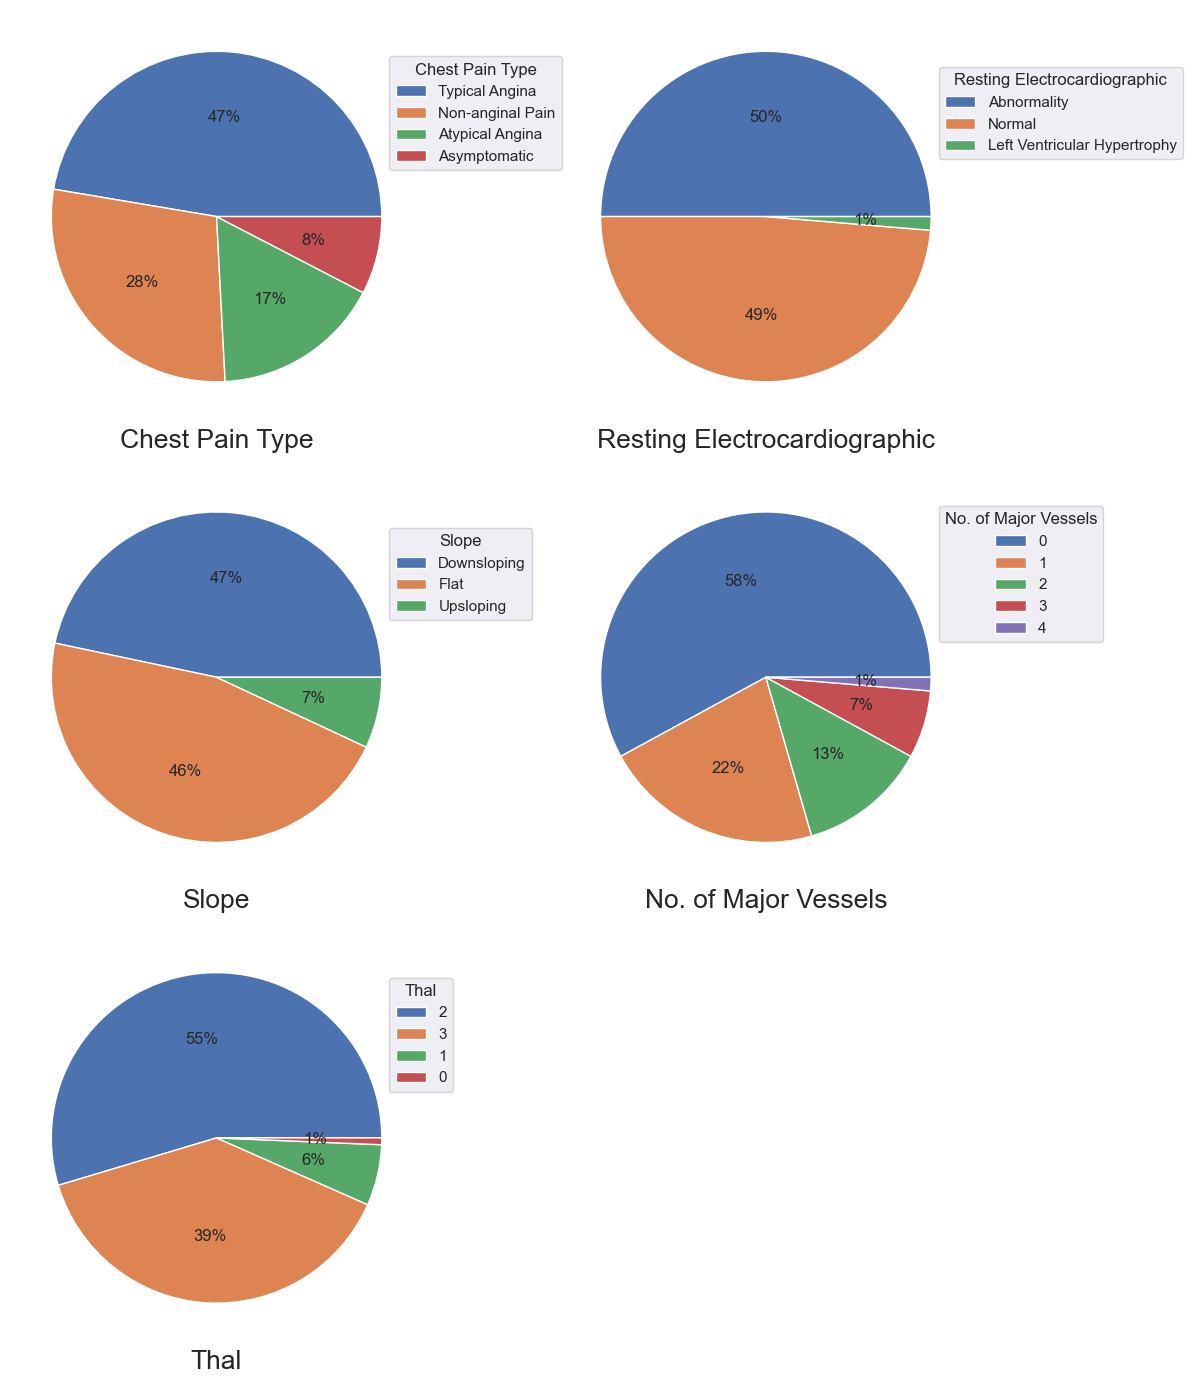

In [12]:
# EDA on more than two categories features
categories=['cp','restecg','slope','ca','thal']
names=['Chest Pain Type','Resting Electrocardiographic','Slope','No. of Major Vessels','Thal']
df=pd.DataFrame(data[categories].values,columns=names)
plt.figure(figsize=(12.5, 14))
palette_color = sns.color_palette()
Chest_Pain_Type=['Typical Angina','Non-anginal Pain','Atypical Angina','Asymptomatic']
Resting_Electrocardiographic=['Abnormality','Normal','Left Ventricular Hypertrophy']
Slope=['Downsloping','Flat','Upsloping']
No_of_Major_Vessels=[0,1,2,3,4]
Thal=[2,3,1,0]

for index, column in enumerate(df.columns):

    ax =plt.subplot(3, 2, index + 1)
    wedges,texts, autotexts=ax.pie(x=data[categories[index]].value_counts(),colors=palette_color,autopct='%.0f%%')
    plt.xlabel(column,fontsize=19)
    
    if (column == 'Chest Pain Type'):
        ax.legend(wedges, Chest_Pain_Type,
          title="Chest Pain Type",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0.5, 1.5))
    if (column == 'Resting Electrocardiographic'):
        ax.legend(wedges, Resting_Electrocardiographic,
          title="Resting Electrocardiographic",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0.5, 1.5))
    if (column == 'Slope'):
        ax.legend(wedges, Slope,
          title="Slope",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0.5, 1.5))
    if (column == 'No. of Major Vessels'):
        ax.legend(wedges, No_of_Major_Vessels,
          title="No. of Major Vessels",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0.5, 1.5))
    if (column == 'Thal'):
        ax.legend(wedges, Thal,
          title="Thal",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0.5, 1.5))
    
    
plt.tight_layout();

In [13]:
# checking correlation
data.corr()['target']

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
Name: target, dtype: float64

<AxesSubplot: >

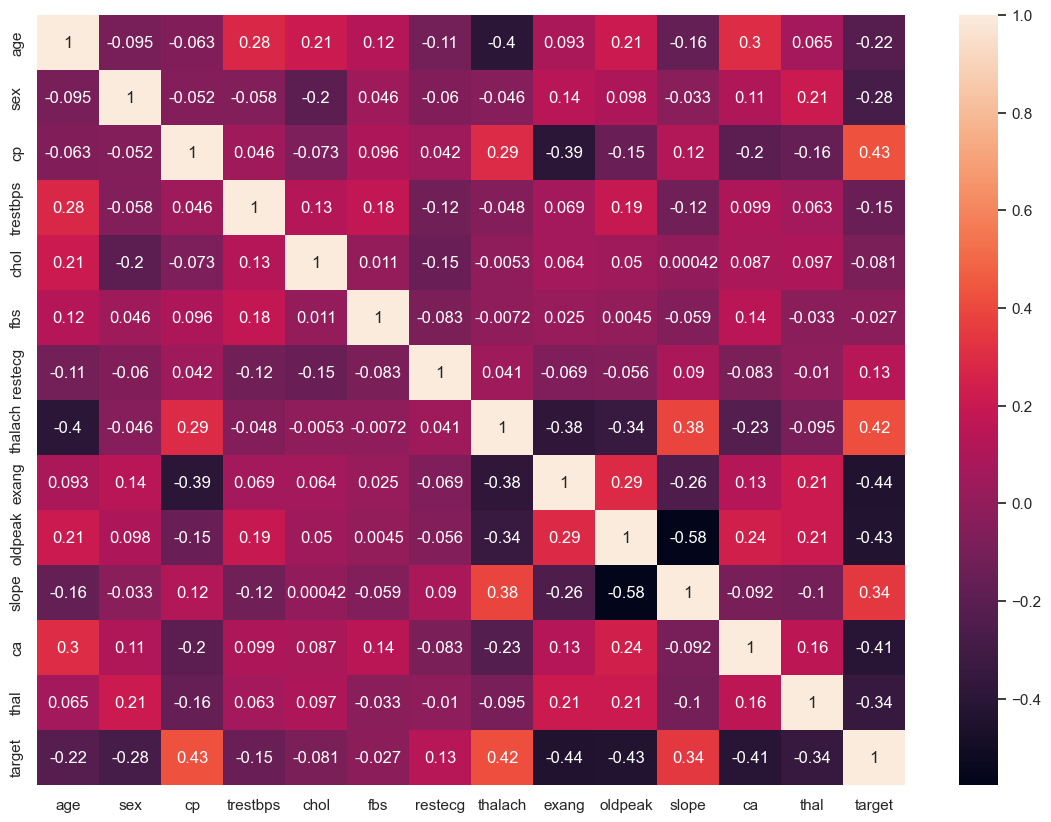

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,)

## Scaling
Feature scaling is a technique used to normalise the range of features in a dataset. Some algorithms are sensitive to feature scaling (e.g. SVMs), while others are invariant (e.g. Random Forests).

I decided to use StandardScaler(), which standardises features by subtracting the mean and dividing by the standard deviation. This transformation results in features with zero mean and unit variance.

In [15]:
sc=StandardScaler()
columns=['age','trestbps','chol','thalach','cp','restecg','slope','ca','thal','oldpeak']
data[columns]=sc.fit_transform(data[columns])

## Splitting the data into Training Set and Test Set

In [16]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Addressing Class Imbalance
As we have seen previously, there is an imbalance in the classes to be predicted, with one class (0 – No Heart Disease) much more prevalent than the other (1 - Heart Disease):

In [17]:
y_train.value_counts()

1    132
0    109
Name: target, dtype: int64

In [18]:
over= SMOTE(sampling_strategy='auto', random_state=42)
X_train,y_train=over.fit_resample(X_train,y_train)

y_train.value_counts()

1    132
0    132
Name: target, dtype: int64

## Building Machine Learning Models

1. Logistic Regresssion
2. SVM
3. Random Forest
4. Voting Classifier
5. Gradient Boost
6. Xgboost

In [19]:
def clf_metrics(classifier,name,X,y):
    print('                 '+'\033[1m'+name+'\033[0m')
    print('------------------------------------------------------')
    y_pred=classifier.predict(X)
    y_pred = y_pred.round()
    print('Accuracy Score : {:.2f}'.format(np.round(accuracy_score(y,y_pred),2)))
    fig, (ax1) = plt.subplots(figsize=(10, 6))
    plot_conf_mx(confusion_matrix(y,y_pred,normalize='true'),ax1)
    print('Precision Score : {}'.format(np.round(precision_score(y,y_pred),2)))
    print('Recall Score : {}'.format(np.round(recall_score(y,y_pred),2)))
    print('F1 Score : {}'.format(np.round(f1_score(y,y_pred),2)))

In [20]:
def plot_conf_mx(cm, ax):
    '''Plot a confusion matrix in the specified axes object.'''
    sns.heatmap(data=cm,
                annot=True,
                cmap='Blues',
                annot_kws={'fontsize': 30},
                ax=ax)

    ax.set_xlabel('Predicted Label')
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])

    ax.set_ylabel('True Label')
    ax.set_yticks([0.40, 1.25])
    ax.set_yticklabels(['No Heart Disease', 'Heart Disease']);

### 1. Logistic Regresssion with Hyperparameter tunning [RandomizedSearchCV]

                 Logistic Regression
------------------------------------------------------
Accuracy Score : 0.86
Precision Score : 0.84
Recall Score : 0.89
F1 Score : 0.86


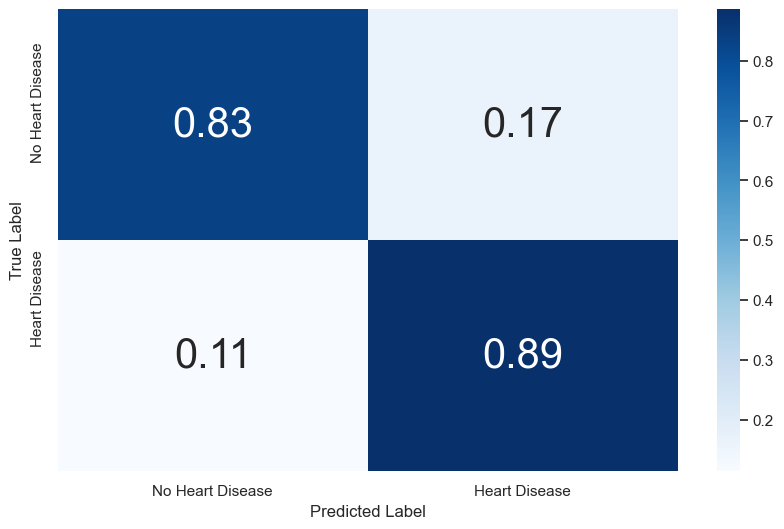

In [21]:
clf1=LogisticRegression()

param_grid={
    'penalty': ['l1','l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear','sag','saga'] 
}
ht_clf1=RandomizedSearchCV(estimator=clf1,param_distributions=param_grid,cv=5,verbose=False,n_jobs=-1,n_iter=9,scoring='neg_mean_squared_error',random_state=42)

classifier_1=ht_clf1.fit(X_train,y_train)

clf_metrics(classifier_1,'Logistic Regression',X_train,y_train)

### 2. Support Vector Classifier with Hyperparameter tunning [RandomizedSearchCV]

                 Support Vector Classifier
------------------------------------------------------
Accuracy Score : 0.87
Precision Score : 0.85
Recall Score : 0.91
F1 Score : 0.88


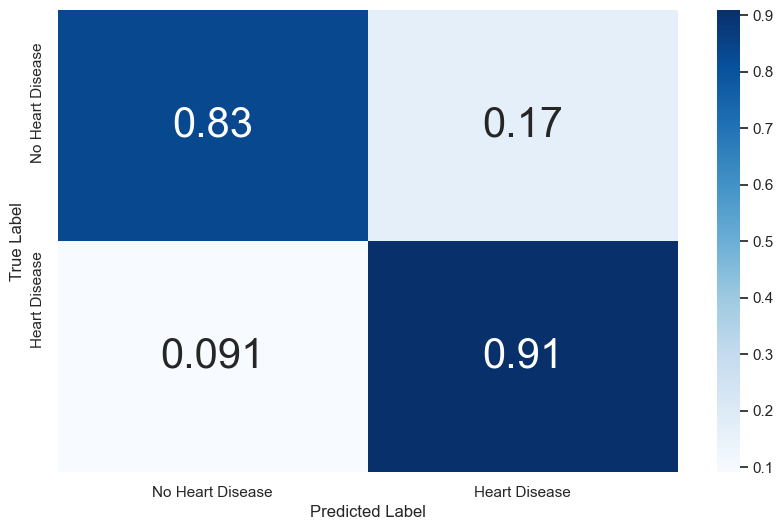

In [22]:
clf2=SVC()

param_grid={
    'kernel': ['linear', 'rbf'],
    'gamma' : ['scale', 'auto'],
    'C' : [.1, 1, 2]
    }

ht_clf2=RandomizedSearchCV(estimator=clf2,param_distributions=param_grid,cv=5,verbose=False,n_jobs=-1,n_iter=9,scoring='neg_mean_squared_error',random_state=42)

classifier_2=ht_clf2.fit(X_train,y_train)

clf_metrics(classifier_2,'Support Vector Classifier',X_train,y_train)

### 3. Random Forest Classifier with Hyperparameter tunning [RandomizedSearchCV]

                 Random Forest Classifier
------------------------------------------------------
Accuracy Score : 0.94
Precision Score : 0.95
Recall Score : 0.94
F1 Score : 0.94


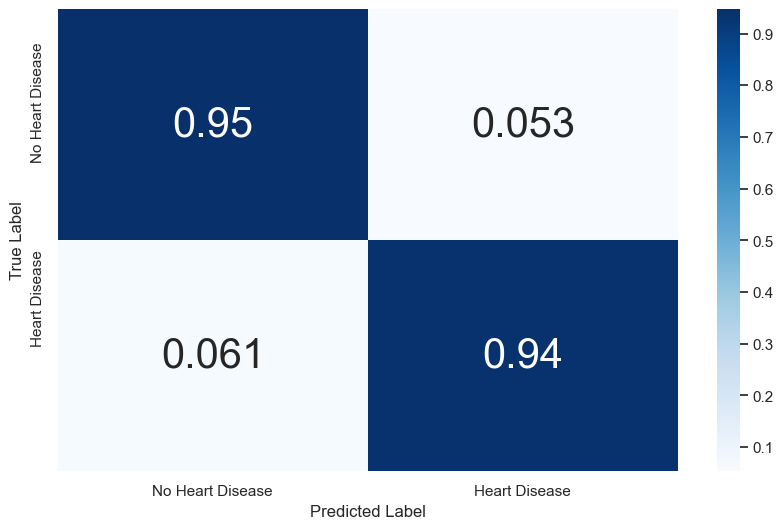

In [23]:
clf3=RandomForestClassifier()

param_grid={
    'n_estimators' : [50,80],

    'max_depth' : [5,10],

    'max_features' : ['auto','sqrt'],

    'min_samples_split' : [2,4,5],

    'min_samples_leaf' : [1,2]

}
ht_clf3= RandomizedSearchCV(estimator=clf3,param_distributions=param_grid,cv=5,verbose=False,n_jobs=-1,n_iter=9,scoring='neg_mean_squared_error',random_state=42)

classifier_3= ht_clf3.fit(X_train,y_train)

clf_metrics(classifier_3,'Random Forest Classifier',X_train,y_train)

### 4. Voting Classifier with Hyperparameter tunning [RandomizedSearchCV]

                 Voting Classifier
------------------------------------------------------
Accuracy Score : 0.90
Precision Score : 0.88
Recall Score : 0.93
F1 Score : 0.9


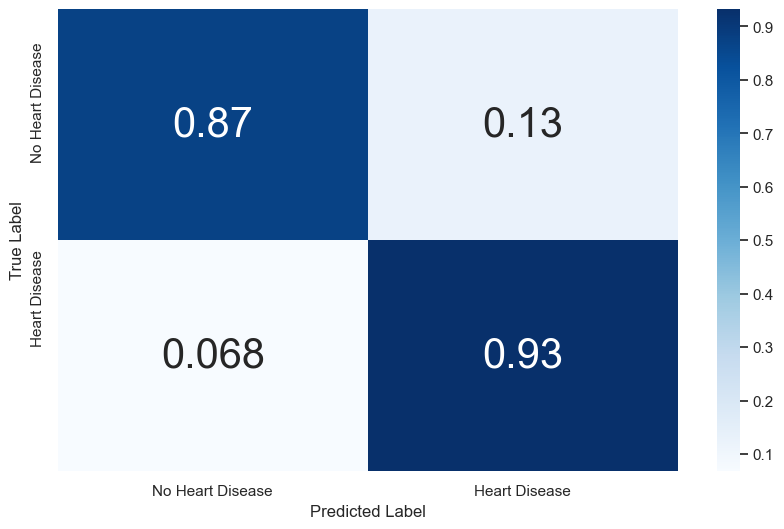

In [24]:
estimators=[('lr',clf1),('svc',clf2),('rf',clf3)]
clf4=VotingClassifier(estimators=estimators)

param_grid={
    'voting': ['hard','soft']
}

ht_clf4=RandomizedSearchCV(estimator=clf4,param_distributions=param_grid,cv=5,verbose=False,n_jobs=-1,n_iter=9,scoring='neg_mean_squared_error',random_state=42)

classifier_4=ht_clf4.fit(X_train,y_train)

clf_metrics(classifier_4,'Voting Classifier',X_train,y_train)

### 5. Gradient Boosting Classifier with Hyperparameter tunning [RandomizedSearchCV]

                 Gradient Boosting Classifier
------------------------------------------------------
Accuracy Score : 0.88
Precision Score : 0.86
Recall Score : 0.9
F1 Score : 0.88


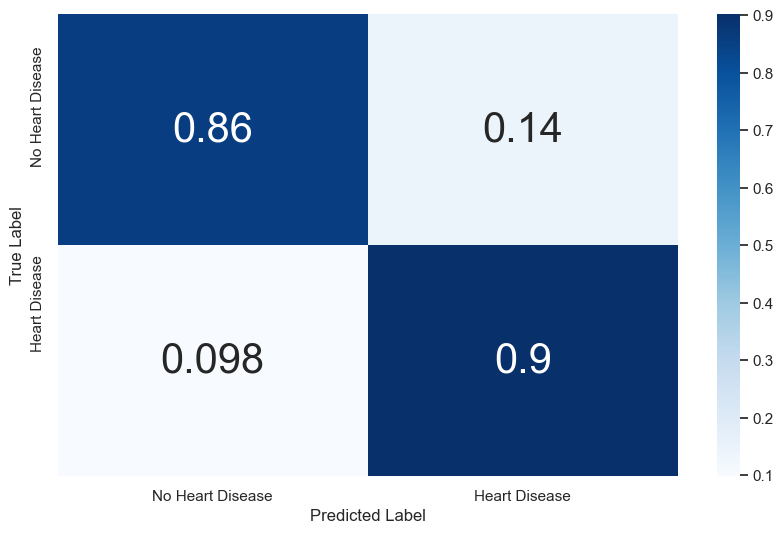

In [25]:
clf5=GradientBoostingClassifier()

param_grid={
    'n_estimators': [100,200],
    'subsample': [0.66, 0.75],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3,4],  # default=3
    'min_samples_split': [5, 7],
    'min_samples_leaf': [3, 5],
    'max_features': ['auto', 'log2', None],
    'n_iter_no_change': [20],
    'validation_fraction': [0.2],
    'tol': [0.01]
}

ht_clf5=RandomizedSearchCV(estimator=clf5,param_distributions=param_grid,cv=5,verbose=False,n_jobs=-1,n_iter=9,scoring='neg_mean_squared_error',random_state=42)

classifier_5=ht_clf5.fit(X_train,y_train)

clf_metrics(classifier_5,'Gradient Boosting Classifier',X_train,y_train)

### 6. XgBoost Classifier without Hyperparameter tunning

                 XgBoost Classifier
------------------------------------------------------
Accuracy Score : 1.00
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0


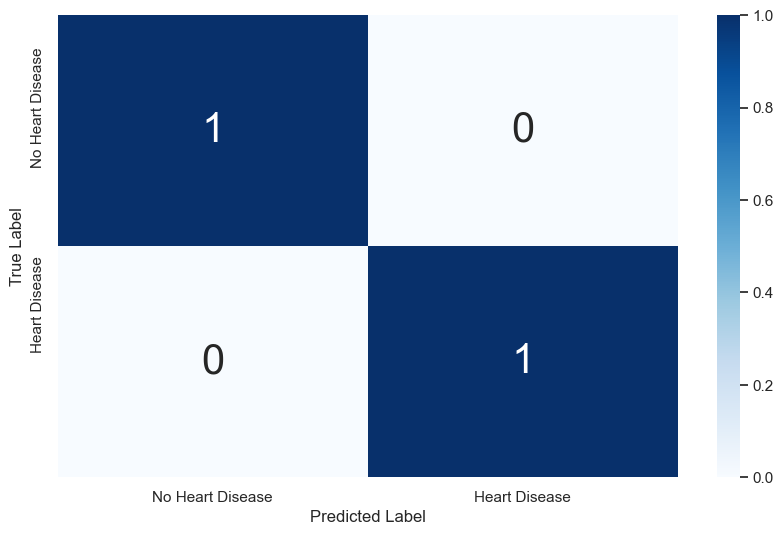

In [26]:
clf6=XGBClassifier()

classifier_6=clf6.fit(X_train,y_train)

clf_metrics(classifier_6,'XgBoost Classifier',X_train,y_train)

## Evaluating the Test Set

                 Logistic Regression
------------------------------------------------------
Accuracy Score : 0.84
Precision Score : 0.87
Recall Score : 0.81
F1 Score : 0.84


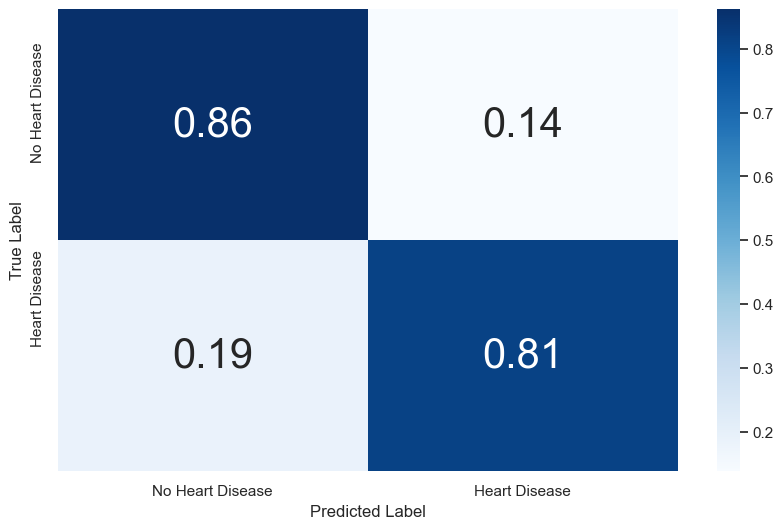

In [27]:
# Logistic Regression
clf_metrics(classifier_1,'Logistic Regression',X_test,y_test)

                 SVC
------------------------------------------------------
Accuracy Score : 0.85
Precision Score : 0.9
Recall Score : 0.81
F1 Score : 0.85


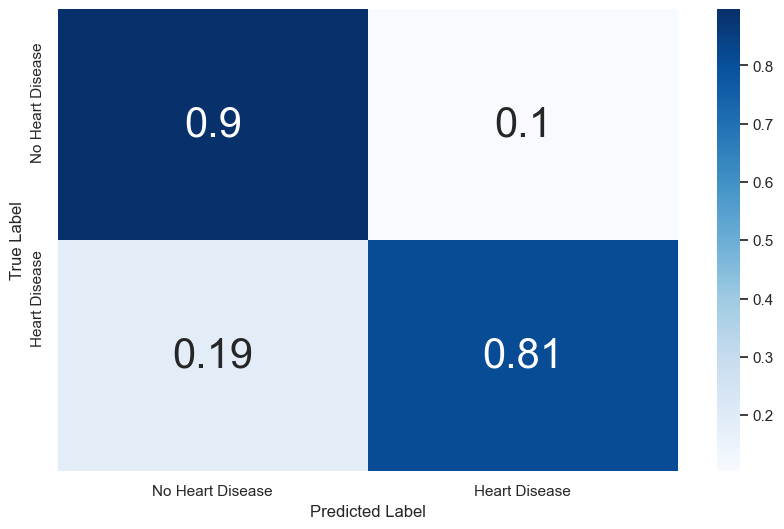

In [28]:
# Support Vector Classifier
clf_metrics(classifier_2,'SVC',X_test,y_test)

                 Random Forest Classifier
------------------------------------------------------
Accuracy Score : 0.87
Precision Score : 0.9
Recall Score : 0.84
F1 Score : 0.87


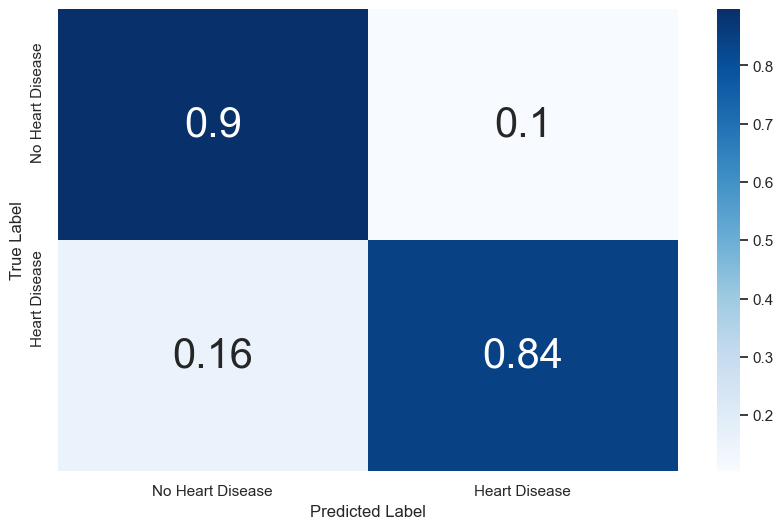

In [29]:
# Random Forest Classifier
clf_metrics(classifier_3,'Random Forest Classifier',X_test,y_test)

                 Voting Classifier
------------------------------------------------------
Accuracy Score : 0.85
Precision Score : 0.85
Recall Score : 0.88
F1 Score : 0.86


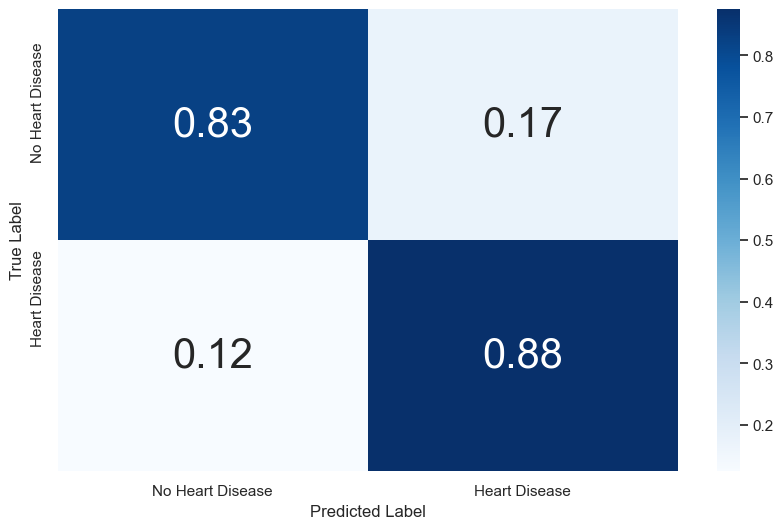

In [30]:
# Voting Classifier
clf_metrics(classifier_4,'Voting Classifier',X_test,y_test)

                 Gradient Boosting Classifier
------------------------------------------------------
Accuracy Score : 0.82
Precision Score : 0.89
Recall Score : 0.75
F1 Score : 0.81


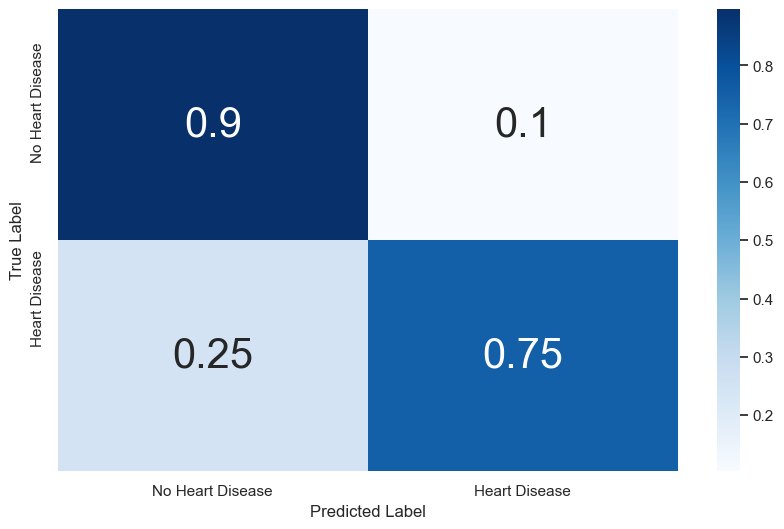

In [31]:
# Gradient Boosting Classifier
clf_metrics(classifier_5,'Gradient Boosting Classifier',X_test,y_test)

                 XGB Classifier
------------------------------------------------------
Accuracy Score : 0.85
Precision Score : 0.87
Recall Score : 0.84
F1 Score : 0.86


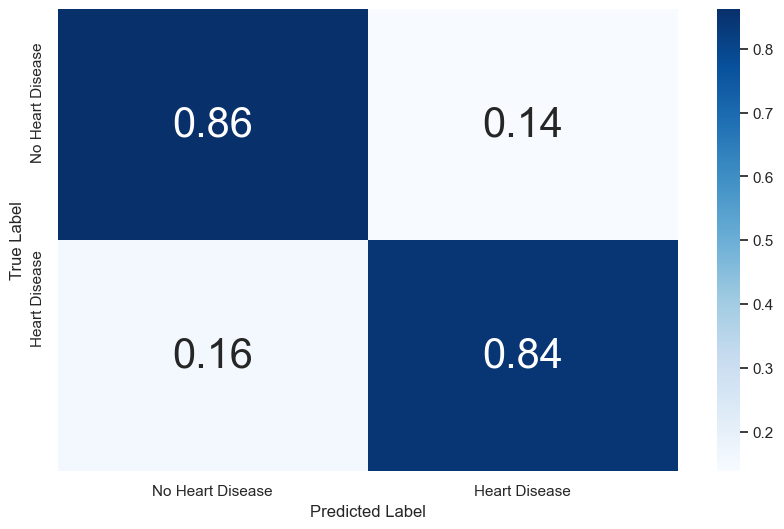

In [32]:
# XGB Classifier
clf_metrics(classifier_6,'XGB Classifier',X_test,y_test)

## Exporting the Model

In [33]:
# Exporting the dataset
df=pd.read_csv('Heart_Disease.csv')
pickle.dump(df,open('df.pkl','wb'))

# Exporting the xgboost model because of the high accuracy of 100% as medical sector should have 100% accurate all the time
pickle.dump(classifier_6,open('model.pkl','wb'))


In [34]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,1.976470,0.764066,-0.261285,1,-1.002541,0.018826,0,1.084022,-2.271182,-0.714911,-2.147955,1
1,-1.928548,1,1.005911,-0.091401,0.067741,0,0.901657,1.636979,0,2.118926,-2.271182,-0.714911,-0.513994,1
2,-1.485726,0,0.035352,-0.091401,-0.822564,0,-1.002541,0.980971,0,0.307844,0.979514,-0.714911,-0.513994,1
3,0.174856,1,0.035352,-0.661712,-0.203222,0,0.901657,1.243374,0,-0.209608,0.979514,-0.714911,-0.513994,1
4,0.285561,0,-0.935208,-0.661712,2.080602,0,0.901657,0.587366,1,-0.382092,0.979514,-0.714911,-0.513994,1
